### 1
**Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!**

**Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.**

Пусть $A$ - редкая группа крови. $B$ - виновен, $\overline{B}$ - невиновен.

Сначала прокурор оценил вероятность $P(A|\overline{B}) = 0.01$, затем сказал, что $1-P(A|\overline{B}) = P(B|A)$, это неверно.

А должен был оценить $P(B|A) = \frac{P(B)*P(A|B)}{P(A)} = \frac{(1/N)*1}{0.01}, N -$ кол-во жителей.

### 2

**Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.**

Он оценил вероятность того, что подсудимый виновен при наличии этой группы крови $P(B|A) = \frac{P(B)P(A|B)}{P(A)} = \frac{10^{-6}*1}{10^{-2}} = 10^{-4} = 0.01\%$

Должен был оценить такую вероятность: $P(\overline{B}|A) = \frac{P(\overline{B})P(A|\overline{B})}{P(A)} = \frac{\frac{999999}{1000000}*\frac{9999}{999999}}{10^{-2}} = \frac{9999}{10000} = 99.99\%$

Я долго думал, но так и не понял, что он сделал неправильно.

### 3

**Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.**

**Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).**

**Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?**

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

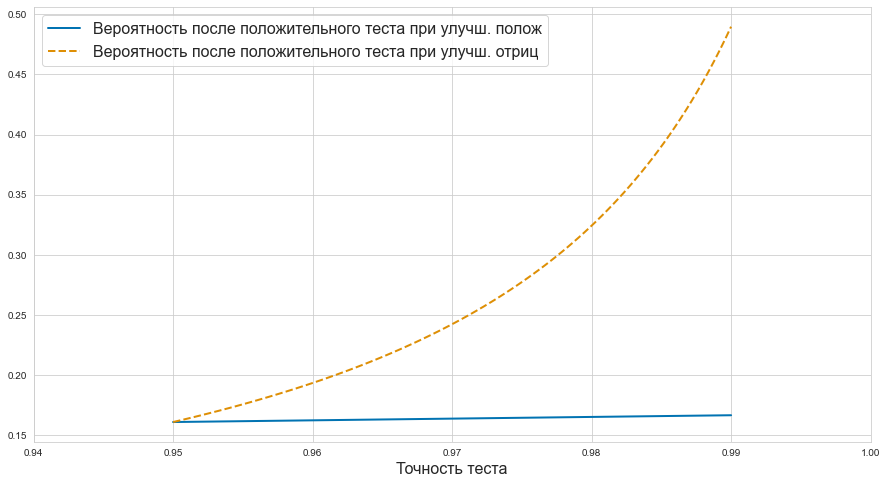

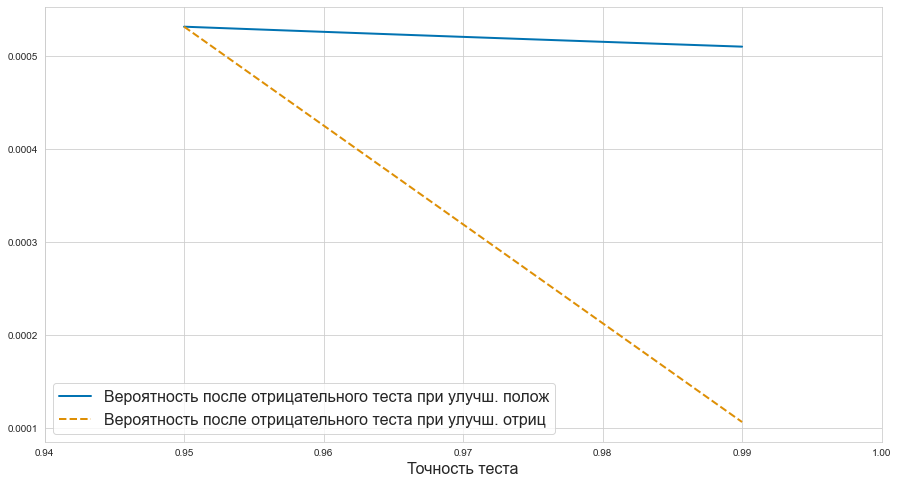

In [59]:
def compute_posterior(data, prior_prob=0.01, test_success_p=0.95, test_success_n=0.95):
    if data == 1:
        return (prior_prob * test_success_p) / (prior_prob * test_success_p + (1-prior_prob) * (1-test_success_n))
    elif data == 0:
        return (prior_prob * (1-test_success_n)) / (prior_prob * (1-test_success_n) + (1-prior_prob) * test_success_p)
    else:
        return None

vector_posterior_p = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs_p = np.linspace(.95, .990, 100)
ys_one_p = vector_posterior_p(1, test_success_p=xs_p)
ys_zero_p = vector_posterior_p(0, test_success_p=xs_p)

vector_posterior_n = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs_n = np.linspace(.95, .990, 100)
ys_one_n = vector_posterior_n(1, test_success_n=xs_n)
ys_zero_n = vector_posterior_n(0, test_success_n=xs_n)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs_p, ys_one_p, linewidth=2, label='Вероятность после положительного теста при улучш. полож')
ax.plot(xs_n, ys_one_n, ls='--', linewidth=2, label='Вероятность после положительного теста при улучш. отриц')
# ax.plot(xs_p, ys_zero_p, linewidth=2, label='Вероятность после отрицательного теста при улучш. полож')
# ax.plot(xs_n, ys_zero_n, ls='--', linewidth=2, label='Вероятность после отрицательного теста при улучш. отриц')
ax.set_xlim((0.94, 1))
ax.set_xlabel('Точность теста', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()



fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs_p, ys_zero_p, linewidth=2, label='Вероятность после отрицательного теста при улучш. полож')
ax.plot(xs_n, ys_zero_n, ls='--', linewidth=2, label='Вероятность после отрицательного теста при улучш. отриц')
ax.set_xlim((0.94, 1))
ax.set_xlabel('Точность теста', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

Мы видим, что при улучшении точности отрицательного теста апостериорная вероятность быть больным после положительного теста выросла больше, чем при улучшении точности положительного теста. А, апостериорная вероятность быть здоровым после отрицательного теста уменьшилась. Из этого можно сделать вывод, что лучше улучшить качество отрицательного теста, то есть уменьшить ошибку при отрицательном результате теста.